In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES']='' # force no CUDA 

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

2021-11-11 19:27:46.113491: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-11 19:27:46.113519: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


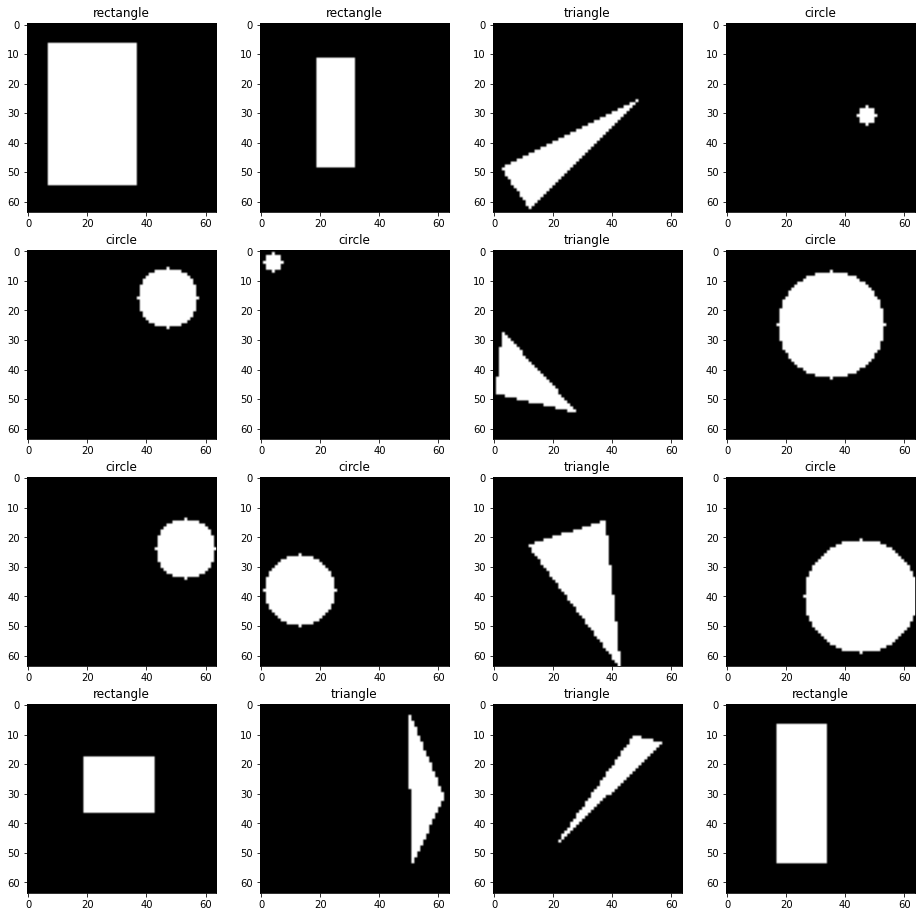

In [2]:
import cv2
import random

r = random.Random(1)

def make_random_image(size):
    img = np.zeros([size, size], dtype=np.uint8)
    
    shape = r.choice(['rectangle', 'circle', 'triangle'])
    if shape == 'rectangle':
        MIN_RECT_SIDE = 5
        left = r.randint(0, size - MIN_RECT_SIDE)
        top = r.randint(0, size - MIN_RECT_SIDE)
        width = r.randint(MIN_RECT_SIDE, size - left)
        height = r.randint(MIN_RECT_SIDE, size - top)
        cv2.rectangle(img, (left, top), (width, height), (1), cv2.FILLED)
    elif shape == 'circle':
        MIN_RADIUS = 3
        MAX_RADIUS = size // 3
        radius = r.randint(MIN_RADIUS, MAX_RADIUS)
        left = r.randint(radius, size - radius)
        top = r.randint(radius, size - radius)
        cv2.circle(img, (left, top), radius, (1), cv2.FILLED)
    elif shape == 'triangle':
        x1 = r.randint(0, size)
        y1 = r.randint(0, size)
        x2 = r.randint(0, size)
        y2 = r.randint(0, size)
        x3 = r.randint(0, size)
        y3 = r.randint(0, size)
        cv2.fillPoly(img, np.array([[(x1, y1), (x2, y2), (x3, y3)]]), (1))
    else:
        raise Error(f'Unknown shape ${shape}')
        
    return shape, img
    
plt.figure(figsize=(16, 16))
for i in range(16):
    shape, img = make_random_image(64)
    plt.subplot(4, 4, i + 1)
    plt.title(shape)    
    plt.imshow(img, cmap=plt.cm.gray)

2021-11-11 19:27:50.170560: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-11-11 19:27:50.170604: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: nebuchadnezzar
2021-11-11 19:27:50.170615: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: nebuchadnezzar
2021-11-11 19:27:50.170704: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 390.144.0
2021-11-11 19:27:50.170736: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 390.144.0
2021-11-11 19:27:50.170745: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 390.144.0


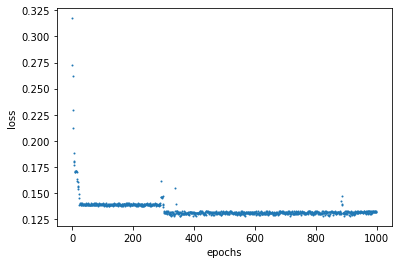

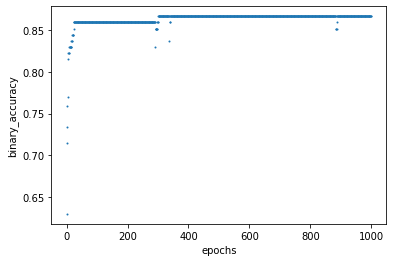

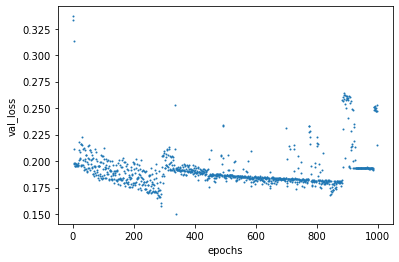

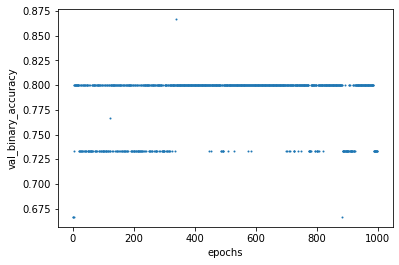

In [3]:
x = []
y = []

for i in range(100):
    shape, img = make_random_image(64)
    x.append(img)
    
    shape_vector = np.array([0, 0, 0])
    if shape == 'rectangle':
        shape_vector[0] = 1
    elif shape == 'circle':
        shape_vector[1] = 1
    elif shape == 'triangle':
        shape_vector[2] = 1
    else:
        raise Error(f'Unknown shape {shape}')
    y.append(shape_vector)

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(64, 64)),
    tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])

model.compile(
    optimizer=tf.keras.optimizers.SGD(3),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=['binary_accuracy'])

history = model.fit(
    x=np.array(x), 
    y=np.array(y), 
    validation_split=0.1,
    epochs=1000, 
    verbose=0)

for key in history.history.keys():
    values = history.history[key]
    plt.scatter(range(len(values)), values, s=1)
    plt.ylabel(key)
    plt.xlabel('epochs')
    plt.show()

prediction=1 actual=triangle


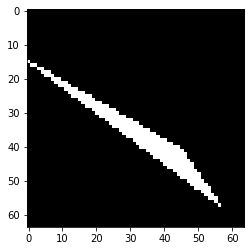

In [4]:
test_shape, test_x = make_random_image(64)
plt.imshow(test_x, cmap=plt.cm.gray)
prediction = np.argmax(model.predict(x=np.array([test_x])))
print(f'prediction={prediction} actual={test_shape}')